### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [2]:
df= pd.read_csv('Car Ownership.csv')
df.head()

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2


### Fast Analysis

In [3]:
df.shape

(500, 8)

In [4]:
df.columns

Index(['Occupation', 'Monthly Income', 'Credit Score', 'Years of Employment',
       'Finance Status', 'Finance History', 'Car', 'Number of Children'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Occupation           490 non-null    object 
 1   Monthly Income       487 non-null    object 
 2   Credit Score         460 non-null    float64
 3   Years of Employment  457 non-null    object 
 4   Finance Status       477 non-null    object 
 5   Finance History      472 non-null    object 
 6   Car                  480 non-null    object 
 7   Number of Children   375 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Credit Score,460.0,702.969565,69.232323,500.0,650.0,700.0,750.0,900.0


In [7]:
df.isna().sum()

Occupation              10
Monthly Income          13
Credit Score            40
Years of Employment     43
Finance Status          23
Finance History         28
Car                     20
Number of Children     125
dtype: int64

In [8]:
df['Monthly Income'].unique()

array(['40000', '60000', '25000', '80000', '100000', '50000', '35000',
       '20000', '120000', '90000', nan, '6000', '3000', '4000', '8000',
       '9000', '12000', '5000', '7000', '3500', '2500', '5500', '4500',
       '10000', '2000', '$4,500 ', '$7,800 ', '$3,200 ', '$6,500 ',
       '$3,000 ', '$3,800 ', '$10,000 ', '$2,500 ', '$5,200 ', '$3,700 ',
       '$8,500 ', '$6,200 ', '$2,800 ', '$9,000 ', '$6,000 ', '$3,500 ',
       '$5,800 ', '$6,800 ', '$2,700 ', '$3,600 ', '$9,200 ', '$3,100 ',
       '$7,000 ', '$4,800 ', '$4,200 ', '$7,500 ', '$5,000 ', '3.2k USD',
       '8.5k USD', '9k', '$4,000 ', '$8,000 ', '$15,000 ', '5k',
       '$9,500 ', '$5,500 ', '$12,000 ', '15k', '$2,000 ', '$1,500 ',
       '$7,200 ', '2.8k', '7.5k', '5000 usd', '2500 usd', '8000 usd',
       '9000 USD', '10000 USD', '3500 USD', '2.5k', '6000 usd',
       '4500 usd', '$2,200 ', '$8 ', '$2,900 ', '$4,100 ', '$8,200 ',
       '$3,900 ', '$4,400 ', '$6,100 ', '$3,400 ', '$8,400 ', '$11,000 ',
       '$4

In [9]:
df['Years of Employment'].unique()

array(['10', '8', '5', '12', '15', '6', '3', '20', nan, '1', '7', '4',
       '2', '3 years', '5 years', '2 years', '7 years', '1 year',
       '4 years', '8 years', '6 years', '2 y', '3 year', '2 year',
       '6 year', '7 y', '10 years', '12 years', '3 y', '9 years',
       '11 years', '7 year', '8 year', '4 year', '5 year'], dtype=object)

In [10]:
df['Credit Score'].unique()

array([750., 800., 650., 900., 700., 600., 850.,  nan, 820., 720., 780.,
       550., 740., 690., 620., 680., 760., 670., 500., 790., 610., 590.,
       730., 640., 630., 710., 660., 840., 890., 770., 830., 560., 810.,
       570., 689., 755., 765., 631., 643., 718., 598., 806., 642., 693.,
       728., 724., 672., 703., 792., 678., 723., 775., 758., 702., 795.,
       715., 654., 742., 732., 695., 726., 725., 708., 745., 641.])

### Data Preprocessing

In [11]:
def remove_chars(text):
    remove =['+','$',',',' ','k','USD','usd','.','years','year','y',' y',]
    for char in remove:
        text=str(text).replace(char, '')
    return text
cols_to_apply=['Monthly Income','Years of Employment','Credit Score']
df[cols_to_apply]= df[cols_to_apply].applymap(remove_chars)

In [12]:
df.isin(['nan']).any()

Occupation             False
Monthly Income          True
Credit Score            True
Years of Employment     True
Finance Status         False
Finance History        False
Car                    False
Number of Children     False
dtype: bool

In [13]:
df.isin(['na']).any()

Occupation             False
Monthly Income         False
Credit Score           False
Years of Employment    False
Finance Status         False
Finance History        False
Car                    False
Number of Children      True
dtype: bool

In [14]:
df['Years of Employment'].replace('nan',np.nan,inplace=True)
df['Monthly Income'].replace('nan',np.nan,inplace=True)
df['Credit Score'].replace('nan',np.nan,inplace=True)
df['Number of Children'].replace('na',np.nan,inplace=True)
df['Years of Employment'].fillna(df['Years of Employment'].mode()[0],inplace=True)
df['Years of Employment']=df['Years of Employment'].astype(int)


In [15]:
df['Years of Employment'].isna().sum()

0

In [16]:
df.dropna(thresh=6,inplace=True)

In [17]:
df.isna().sum()

Occupation               0
Monthly Income           2
Credit Score            24
Years of Employment      0
Finance Status           4
Finance History          9
Car                      3
Number of Children     135
dtype: int64

In [18]:
df[df['Finance Status'].isna()==True]

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
377,Physical Therapist,7000,7650,6,NaN,No significant issues,Yes,2
399,Medical Assistant,2900,6100,2,NaN,"Late payments, collections",No,0
402,Account Executive,6800,7150,5,NaN,No significant issues,Yes,0
464,IT Manager,8500,7500,7,NaN,No significant issues,Yes,2


In [19]:
nan_rows = df[df['Finance Status'].isna()==True].index

df.loc[nan_rows[0], 'Finance Status'] ='Good'
df.loc[nan_rows[1], 'Finance Status'] ='Poor'
df.loc[nan_rows[2], 'Finance Status'] ='Good'
df.loc[nan_rows[3], 'Finance Status'] ='Good'

In [20]:
df['Finance Status'].value_counts()

Stable       304
Unstable      87
Good          29
Fair          28
Excellent     22
Poor           9
Unknow         1
Unkonw         1
Name: Finance Status, dtype: int64

In [21]:
df=df.drop((df[(df['Finance Status'] == 'Unknow') | (df['Finance Status'] == 'Unkonw')]).index)

In [22]:
df.head()

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,7500,10,Good,No issues,Yes,2
1,Engineer,60000,8000,8,Good,No issues,Yes,1
2,Nurse,25000,6500,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,9000,12,Excellent,No issues,Yes,3
4,Businessman,100000,7000,15,Good,Late payment 6 months ago,Yes,2


In [23]:
df['Finance History'].value_counts()

No significant issues                        313
Missed payments in the past                   50
Late payments                                 31
Late payments, collections                    17
No issues                                     12
Poor                                          12
Excellent                                     10
Good                                           8
Fair                                           6
Late payment 2 months ago                      2
Late payment 6 months ago                      2
Late payment 3 months ago                      2
Late payment 1 month ago                       2
Late payment                                   1
No significant issue                           1
Missed payments, collections, charge-offs      1
Name: Finance History, dtype: int64

In [24]:
df['Finance History'].fillna(df['Finance History'].mode()[0],inplace=True)

In [25]:
df.loc[df['Finance History'].str.contains('Late'), 'Finance History'] = 'Late payments'
df.loc[df['Finance History'].str.contains('No'), 'Finance History'] = 'No issues'
df.loc[df['Finance History'].str.contains('Missed'), 'Finance History'] = 'Missed payments'

In [26]:
df['Finance History'].value_counts()

No issues          335
Late payments       57
Missed payments     51
Poor                12
Excellent           10
Good                 8
Fair                 6
Name: Finance History, dtype: int64

In [27]:
df.dropna(subset=['Car'],inplace=True)

In [28]:
df.isna().sum()

Occupation               0
Monthly Income           2
Credit Score            23
Years of Employment      0
Finance Status           0
Finance History          0
Car                      0
Number of Children     135
dtype: int64

In [29]:
df['Number of Children'].fillna(df['Number of Children'].mode()[0],inplace=True)

In [30]:
df.isna().sum()

Occupation              0
Monthly Income          2
Credit Score           23
Years of Employment     0
Finance Status          0
Finance History         0
Car                     0
Number of Children      0
dtype: int64

In [31]:
df.head(15)

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,7500,10,Good,No issues,Yes,2
1,Engineer,60000,8000,8,Good,No issues,Yes,1
2,Nurse,25000,6500,5,Fair,Late payments,No,0
3,Doctor,80000,9000,12,Excellent,No issues,Yes,3
4,Businessman,100000,7000,15,Good,Late payments,Yes,2
5,Engineer,50000,7500,6,Fair,No issues,No,1
6,Teacher,35000,7000,8,Fair,Late payments,Yes,0
7,Nurse,20000,6000,3,Poor,Late payments,No,0
8,Businessman,120000,8500,20,Excellent,No issues,Yes,0
9,Doctor,90000,8000,10,Good,No issues,Yes,0


In [32]:
df.isna().sum()

Occupation              0
Monthly Income          2
Credit Score           23
Years of Employment     0
Finance Status          0
Finance History         0
Car                     0
Number of Children      0
dtype: int64

In [33]:
df['Credit Score']=df['Credit Score'].astype(float)
df['Credit Score'].fillna(df['Credit Score'].mean(),inplace=True)

In [34]:
df['Monthly Income']=df['Monthly Income'].astype(float)
df['Monthly Income'].fillna(df['Monthly Income'].mean(),inplace=True)
df['Credit Score'].fillna(df['Credit Score'].mean(),inplace=True)

In [35]:
num_cols=['Monthly Income','Credit Score','Years of Employment','Number of Children']
df[num_cols]=df[num_cols].astype(float)

In [36]:
df['Monthly Income'].min()

5.0

In [37]:
df['Monthly Income'].max()

120000.0

In [38]:
def multiply(value):
    if value<86:
        return  value*1000
    return value
df['Monthly Income'] =df['Monthly Income'].apply(multiply)

### Visualization

<AxesSubplot:>

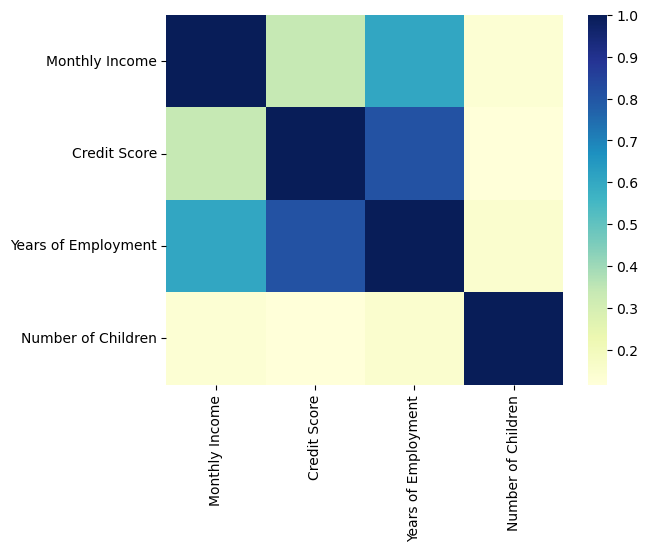

In [39]:
sns.heatmap(df.corr(),cmap='YlGnBu')

### Outlier Value Analysis

<AxesSubplot:ylabel='Credit Score'>

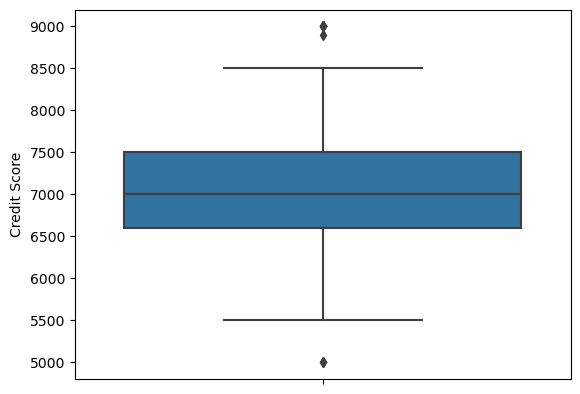

In [40]:
sns.boxplot(data=df,y='Credit Score')

<AxesSubplot:xlabel='Years of Employment', ylabel='Credit Score'>

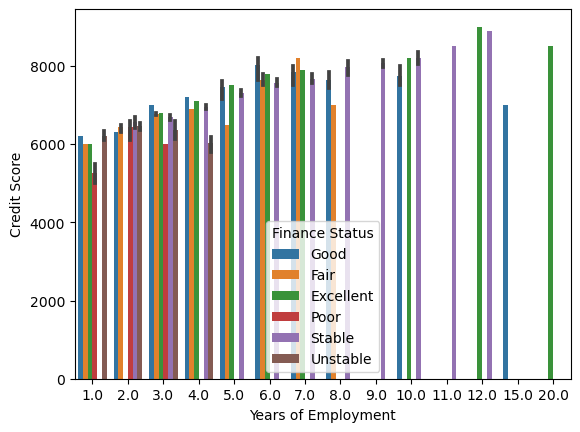

In [41]:
sns.barplot(data=df,x='Years of Employment',y='Credit Score',hue='Finance Status')

In [42]:
df['Car'].replace({'Yes':1,'No':0}, inplace =True)

<AxesSubplot:xlabel='Years of Employment', ylabel='Credit Score'>

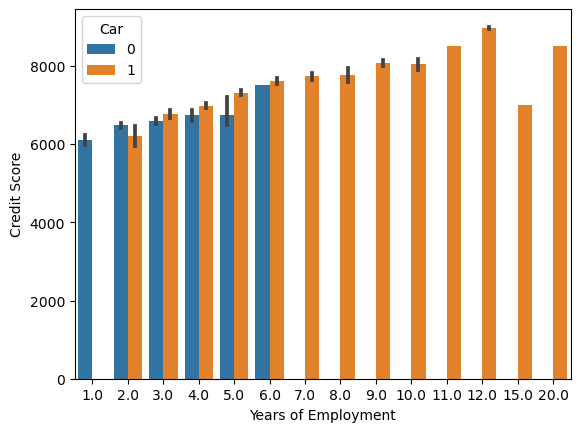

In [43]:
sns.barplot(data=df,x='Years of Employment',y='Credit Score',hue='Car')

In [44]:
df['Occupation']=df['Occupation'].astype(str)

In [45]:
# Grouping occupations
other_occ_counts= df['Occupation'].value_counts()
other_occupations=other_occ_counts[other_occ_counts<10]
df.loc[df['Occupation'].isin(other_occupations.index),'Occupation']='Other'

In [46]:
main_occ_counts= df['Occupation'].value_counts()
main_occupations=other_occ_counts[(other_occ_counts>=5)& (other_occ_counts<338)]
df.loc[df['Occupation'].isin(main_occupations.index),'Occupation']='Main'

In [47]:
df['Occupation'].value_counts()

Other    338
Main     138
Name: Occupation, dtype: int64

In [48]:
df=pd.get_dummies(data=df, columns=['Occupation','Finance Status','Finance History'],drop_first=False)

In [49]:
df['Car'].replace({'Yes':1,'No':0}, inplace =True)

In [50]:
df.head()

,Monthly Income,Credit Score,Years of Employment,Car,Number of Children,Occupation_Main,Occupation_Other,Finance Status_Excellent,Finance Status_Fair,Finance Status_Good,Finance Status_Poor,Finance Status_Stable,Finance Status_Unstable,Finance History_Excellent,Finance History_Fair,Finance History_Good,Finance History_Late payments,Finance History_Missed payments,Finance History_No issues,Finance History_Poor
0,40000.0,7500.0,10.0,1,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,60000.0,8000.0,8.0,1,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,25000.0,6500.0,5.0,0,0.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,80000.0,9000.0,12.0,1,3.0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4,100000.0,7000.0,15.0,1,2.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Monthly Income                   476 non-null    float64
 1   Credit Score                     476 non-null    float64
 2   Years of Employment              476 non-null    float64
 3   Car                              476 non-null    int64  
 4   Number of Children               476 non-null    float64
 5   Occupation_Main                  476 non-null    uint8  
 6   Occupation_Other                 476 non-null    uint8  
 7   Finance Status_Excellent         476 non-null    uint8  
 8   Finance Status_Fair              476 non-null    uint8  
 9   Finance Status_Good              476 non-null    uint8  
 10  Finance Status_Poor              476 non-null    uint8  
 11  Finance Status_Stable            476 non-null    uint8  
 12  Finance Status_Unstabl

# Prediction

### Catboost Algorithm

In [52]:
X=df.drop('Car',axis=1)
y=df['Car']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42)
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

0:	learn: 0.6493034	total: 72.8ms	remaining: 7.2s
1:	learn: 0.5980762	total: 74.1ms	remaining: 3.63s
2:	learn: 0.5574632	total: 75.5ms	remaining: 2.44s
3:	learn: 0.5225540	total: 76.8ms	remaining: 1.84s
4:	learn: 0.4917671	total: 77.8ms	remaining: 1.48s
5:	learn: 0.4635502	total: 78.8ms	remaining: 1.23s
6:	learn: 0.4403283	total: 79.9ms	remaining: 1.06s
7:	learn: 0.4211391	total: 81ms	remaining: 931ms
8:	learn: 0.4012469	total: 82.2ms	remaining: 831ms
9:	learn: 0.3807695	total: 83.5ms	remaining: 752ms
10:	learn: 0.3672465	total: 84.3ms	remaining: 682ms
11:	learn: 0.3534276	total: 85ms	remaining: 623ms
12:	learn: 0.3417324	total: 85.7ms	remaining: 574ms
13:	learn: 0.3305726	total: 86.5ms	remaining: 531ms
14:	learn: 0.3193189	total: 87.4ms	remaining: 495ms
15:	learn: 0.3089459	total: 88ms	remaining: 462ms
16:	learn: 0.2994714	total: 88.7ms	remaining: 433ms
17:	learn: 0.2919414	total: 89.1ms	remaining: 406ms
18:	learn: 0.2862633	total: 89.6ms	remaining: 382ms
19:	learn: 0.2798082	total: 9

In [53]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8645833333333334

### Random Forests Algorithm

In [54]:
X=df.drop('Car',axis=1)
y=df['Car']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc_score =accuracy_score(y_test,y_pred)
acc_score

0.9166666666666666

### XGBoost Algorithm

In [55]:
model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.9166666666666666